# Homework Assignment 3 - BIA 6304 - Corey Austen

#### Q1. Write a short description of the results of these “baseline” models. Make sure your answer is no longer than four paragraphs, and should at minimum answer these questions:
#### •	What decisions did you make when creating your feature space? Why?  
#### •	How do these classifiers address your question?
#### •	How did your models perform? Are you happy with the results?  Why or why not?
#### Audience: general – management or non-technical staff. NOTE: this is a GENERAL AUDIENCE RESPONSE - be VERY careful with how you mention/describe/discuss the various models.  Detailed descriptions of the classifiers is not required but any discussion of them must be NON TECHNICAL (but not fluffy).  

A1. The question I am trying to answer is the "Can I create a classifier that can match the accuracy of the sentiment analysis I previously ran on the State of the Union Speech data?" The data that I am working with is the transcript text of the 2018 State of the Union address.  In a previous excersize, I ran an analysis that labeled each line of the speech as having a positive, nagative, or neutral sentiment.  The purpose of this excesize is to create an automated classifier that can look at speeches like this one and label them as positive, negative, or neutral accurately.

In order to test this, I created 4 predictive models: logistic regression, decision tree, naive bayes, and KNN.  

Before running the text through the models, I had to vectorize the date.  I did this using a count vectorizer. The count vectorizer works to tailor down a feature space that will best represent the text it is pulled from.  The feature space is configured to include words that appear more than 3% of the time, but less than 50%.  The idea here is to zero in on the most important words. If the words appear less than 3% of the time, we can assume that they would not have a lot of predictive power. Anything that appears more than 50%, the same can be assumed, since it would appear so often.  I chose to remove the stop words, as well as a few extra that are not included by default, that add no contextual value to the text. I also replaced some words in the text that had the same meaning to better capture them in the feature space.  I also set the vectorizer to look for recurring pairs of words to add to the feature space.

The baseline models I created performed rather poorly.  The models were scored based on their accuracy. The Logistic Regression  model accurately predicted the sentiment of the text 46% of the time.  The decision tree model had a 48% accuracy rate.  The KNN clustering model scored a 44%.  The best overall was the Naive Bayes model, with a 51% accuracy rate.  These models would not be useful in any sense, as any of these models being used a classifier would produce unreliable results.

#### Q2. Write a short description of the improvement you were able to make in your prediction. Make sure your answer is no longer than four paragraphs, and should at minimum answer these questions:
#### •	What combination of classifiers and settings did you use and why?
#### •	Which model fit “best” and what metric did you use for the comparison? Why? 
#### •	Are you happy with the results? Why or why not?  What could you do to improve on the “best” model’s performance?
#### Audience: technical – fellow data scientists or other technical staff.
 
A2. I made two different improvements to the models I created.  The first improvement was to use a tfidf vectorizor instead of the count vectorizer, but leaving all other settings intact.  I wanted to see if using weights would have any effect on the actual models.  Unfortunately, the improvements were marginal at best, with some models seeing some decline in accuracy.  The Naive Bays model performed worse with 46% accuracy (compared to 51% before.)  Logistic Regression also performed worse with 44%, (down from 46%.)  However, the decision tree did see some improvement, with an accuracy score of 53% (up from 48%.) 

Unsatisfied with these results, I changed things again.  For the second revision, I added a lemmetizer to the preprocessing steps, and decided to keep using the tfidf weights like in the previous revision.  I decided to do this and leave the tfidf vectorizer in hopes of seeing significant improvement in the decision tree model.  The Naive Bayes model say a drop in accuracy again, with 44% accuracy.  The Logistic Regression model scored the same, at 44%.  The Decision tree model, however, did see some improvement, with an accuracy rate of 60%.  Although this was a significant improvement, I would not say that I am happy with these results.  A model with a 60% accuracy rate would still not produce a reliable classifier.  In order to improve on this model even further, we would likely need to do much more preprocessing and tweek the settings of the vectorizer more to improve this a bit more.

#### Q3.  Write a short description of the outcome of your clustering exercise. Make sure your answer is no longer than four paragraphs, and should at minimum answer these questions:
#### •	How many clusters did you “find”? Why did you select that number? 
#### •	Can you easily describe your clusters with a text label?  If so, what are the labels and how do they help?  If not, why not? 
#### Audience: general – management or non-technical staff. NOTE: this is a GENERAL AUDIENCE RESPONSE - be VERY careful with how you describe the clustering exercise.  Detailed descriptions of K-means is not required but any discussion of them must be NON TECHNICAL (but not fluffy).

A3.  To begin the k-means excersize, I created an elbow chart that shows how much of the variance between each cluster is explained.  Since the graph does not show a visible "elbow," it isn't terribly obvious where the k-value should be set.  I ended up settling on 16 clusters.  The reason I chose this number is because the clusters all were more evenly distributed than other k values, and there was a very slight change in the elbow graph at that value.

Unfortunately I cannot easily describe the clusters.  I assigned the cluster value to each row, then exported the dataframe to a csv file to examine in Excel.  I went through and could not easily identify similarities in the clusters. Based on this, I would say that the cluster analysis is not a useful way to to look at this text data.

In [1]:
# Setting up
import pandas as pd
import numpy as np
import re
import requests
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import math
from __future__ import division
from nltk.corpus import stopwords
from sklearn.feature_extraction import text
pd.set_option('display.max_colwidth', 150)

In [2]:
pathname = "/Users/ca034330/Google Drive/Corey - School/Spring 2018 A/BIA 6304 - Text Mining/HW_2/"
pd.set_option('display.max_colwidth', 15000)

In [3]:
speechdf = pd.read_csv(pathname + "trump_speech.csv", index_col = 0) 
print(speechdf.shape)
print(list(speechdf))

(149, 1)
['text']


### T1.  Read in or create a data frame with at least one column of text to be analyzed.  This could be the text you used previously or new text. Choose a prediction you would like to make with these data and create the appropriate feature space. Identify the labels you will be trying to predict and proceed to create a train-test split. Using default model parameters, fit 3 classifiers (decision tree, naïve bayes, logistic regression, or knn) to your dataset and subsequently generate predictions (just like we did in class). Feel free to set a random state variable where appropriate to facilitate replication.  Assess the performance of the models using any of the measures (confusion matrices, precision, recall, f1-score, and accuracy).

In [4]:
#Task 1 - Using the Trump Speech data, create a Decision Tree, Logistic Regression, and KNN.  Predict the positive/negative sentiment.
#Random state of 42
#Creating the nltk stopword list and adding terms to it that appear too often and add no meaning.
nltk_stopwords = stopwords.words("english")
skl_stopwords = text.ENGLISH_STOP_WORDS

custom_nltk = nltk_stopwords + ["000", "mr", "said", "says","say", "ms", "also", "has", "this", "one", "home", "every", "tonight" ]

#nltk_stopwords.remove('before') #In case I need to remove words

In [5]:
#Creating a dictionary to replace words in the corpus in order to combine like terms.
speech_dict = {'united states':'america', 'americans': 'american', 'years':'year', "us":"american"}


def multiple_replace(dict, text): 

  text = str(text).lower()

  # Create a regular expression  from the dictionary keys
  regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))

  # For each match, look-up corresponding value in dictionary
  return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text)

In [6]:
#use the dictionary to replace words in the corpus

speechdf['cleantext'] = speechdf.text.apply(lambda x: multiple_replace(speech_dict, x))
speechdf[0:1] 

,text,cleantext
0,"Mr. Speaker, Mr. Vice President, members of Congress, the first lady of the United States, and my fellow Americans:","mr. speaker, mr. vice president, members of congress, the first lady of the america, and my fellow american:"


In [7]:
cv = CountVectorizer(binary=False, min_df = .03, max_df = .5,stop_words = custom_nltk, ngram_range = (1,2))
cv_speech = cv.fit_transform(speechdf['cleantext'])
print(cv_speech.shape)

names = cv.get_feature_names()
count = np.sum(cv_speech.toarray(), axis = 0)
count2 = count.tolist()
count_df = pd.DataFrame(count2, index = names, columns = ['count'])
count_df.sort_values(['count'], ascending = False)[0:10]

(149, 71)


,count
american,79
america,33
year,29
people,26
new,21
tax,15
country,15
last,13
congress,13
great,13


In [8]:
pathname = "/Users/ca034330/Google Drive/Corey - School/Spring 2018 A/BIA 6304 - Text Mining/HW_2/Dictionaries/"

In [9]:
#Creating a new sentiment dictionary.
new_afinn = {}
for line in open(pathname+"AFINN-111.txt"):
    tt = line.split('\t')
    new_afinn.update({tt[0]:int(tt[1])})

In [10]:
# Adding a new term to the sentiment dictionary
new_afinn['rescue'] =3

In [11]:
def new_afinn_sent(inputstring):
    
    sentcount =0
    for word in inputstring.split():  
        if word.rstrip('?:!.,;') in new_afinn:
            sentcount = sentcount + new_afinn[word.rstrip('?:!.,;')]
             
    if (sentcount < 0):
        sentiment = 'Negative'
    elif (sentcount >0):
        sentiment = 'Positive'
    else:
        sentiment = 'Neutral'
    
    return sentiment

In [12]:
speechdf['afinn'] = speechdf["cleantext"].apply(lambda x: new_afinn_sent(x))

In [13]:
speechdf.iloc[0:10][['cleantext','afinn']]

,cleantext,afinn
0,"mr. speaker, mr. vice president, members of congress, the first lady of the america, and my fellow american:",Neutral
1,"less than one year has passed since i first stood at this podium, in this majestic chamber, to speak on behalf of the american people — and to address their concerns, their hopes and their dreams. that night, our new administration had already taken swift action. a new tide of optimism was already sweeping across our land.",Positive
2,"each day since, we have gone forward with a clear vision and a righteoamerican mission — to make america great again for all american.",Positive
3,"over the last year, we have made incredible progress and achieved extraordinary success. we have faced challenges we expected, and others we could never have imagined. we have shared in the heights of victory and the pains of hardship. we endured floods and fires and storms. but through it all, we have seen the beauty of america's soul, and the steel in america's spine.",Positive
4,"each test has forged new american heroes to remind american who we are, and show american what we can be.",Positive
5,"we saw the volunteers of the ""cajun navy,"" racing to the rescue with their fishing boats to save people in the aftermath of a devastating hurricane.",Positive
6,we saw strangers shielding strangers from a hail of gunfire on the las vegas strip.,Positive
7,"we heard tales of american like coast guard petty officer ashlee leppert, who is here tonight in the gallery with melania. ashlee was aboard one of the first helicopters on the scene in hoamericanton during hurricane harvey. through 18 hours of wind and rain, ashlee braved live power lines and deep water to help save more than 40 lives. thank you, ashlee.",Positive
8,we heard about american like firefighter david dahlberg. he is here with american too. david faced down walls of flame to rescue almost 60 children trapped at a california summer camp threatened by wildfires.,Positive
9,"to everyone still recovering in texas, florida, louisiana, puerto rico, the virgin islands, california and everywhere else — we are with you, we love you, and we will pull through together.",Positive


### Time to create the train/test sets

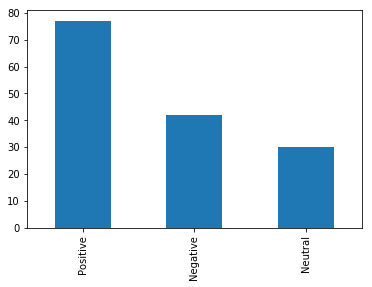

In [14]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# get a feel for the distribution
speechdf['afinn'].value_counts().plot(kind='bar')

In [15]:
# train test split
# data are X, labels are y
from sklearn.model_selection import train_test_split

X = cv_speech.toarray()  #remember this is the output from the vectorizer and we are turning it into an array
print(type(X), X[0:10])

y = speechdf['afinn'].values #this is an array of labels
print(type(y), y[0:10])


<class 'numpy.ndarray'> [[0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random_state is set seed

# function creates 4 output structures - order matters
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(104, 71)
(45, 71)
(104,)
(45,)


### Native Bayes Model

In [17]:
# Multinomial Naive Bayes
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# fit a Naive Bayes model to the data
model = MultinomialNB()
print(model)
model.fit(X_train, y_train)

# make predictions
nb_expected = y_test
nb_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(nb_expected, nb_predicted)))
print(metrics.classification_report(nb_expected, nb_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.511111111111
accuracy: 0.511111111111
             precision    recall  f1-score   support

   Negative       0.71      0.28      0.40        18
    Neutral       0.20      0.33      0.25         6
   Positive       0.57      0.76      0.65        21

avg / total       0.58      0.51      0.50        45



### Decision tree Model

In [18]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a logistic regression model to the data
model = DecisionTreeClassifier(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
tree_expected = y_test
tree_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(tree_expected, tree_predicted)))
print(metrics.classification_report(tree_expected, tree_predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
0.488888888889
accuracy: 0.488888888889
             precision    recall  f1-score   support

   Negative       0.55      0.61      0.58        18
    Neutral       0.00      0.00      0.00         6
   Positive       0.58      0.52      0.55        21

avg / total       0.49      0.49      0.49        45



In [19]:
#create the tree
#from sklearn import tree
#dot_data = tree.export_graphviz(model, out_file=None, 
#                         feature_names=cv.get_feature_names() ,  
#                         class_names=speechdf.afinn.unique() ,  
#                         filled=True, rounded=True,  
#                         special_characters=True) 

In [20]:
#import graphviz 
#graph = graphviz.Source(dot_data)  # creates the graph 
#graph #renders the graph inline

### Logistic Regression Model

In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
log_expected = y_test
log_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(log_expected, log_predicted)))
print(metrics.classification_report(log_expected, log_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.466666666667
accuracy: 0.466666666667
             precision    recall  f1-score   support

   Negative       0.75      0.33      0.46        18
    Neutral       0.00      0.00      0.00         6
   Positive       0.50      0.71      0.59        21

avg / total       0.53      0.47      0.46        45



### KNN Model

In [22]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

# instantiate learning model (k = 3)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)


# make predictions
knn_expected = y_test
knn_predicted = model.predict(X_test)


print(model.score(X_test,y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(knn_expected, knn_predicted)))
print(metrics.classification_report(knn_expected, knn_predicted))

0.444444444444
accuracy: 0.444444444444
             precision    recall  f1-score   support

   Negative       0.46      0.67      0.55        18
    Neutral       0.00      0.00      0.00         6
   Positive       0.57      0.38      0.46        21

avg / total       0.45      0.44      0.43        45



In [2]:
import graphviz

ModuleNotFoundError: No module named 'graphviz'

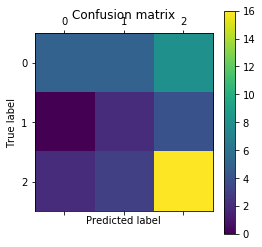

[[ 5  5  8]
 [ 0  2  4]
 [ 2  3 16]]


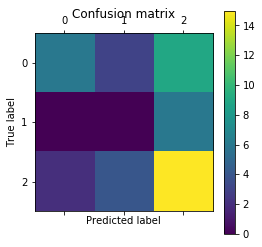

[[ 6  3  9]
 [ 0  0  6]
 [ 2  4 15]]


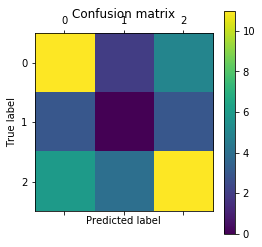

[[11  2  5]
 [ 3  0  3]
 [ 6  4 11]]


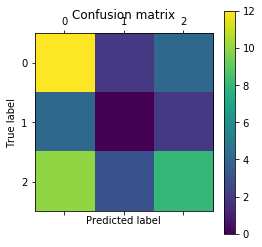

[[12  2  4]
 [ 4  0  2]
 [10  3  8]]


In [23]:
# display confusion matrix
def create_cm(t1, t2):
    cm = metrics.confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

create_cm(nb_expected, nb_predicted)    
create_cm(log_expected, log_predicted)
create_cm(tree_expected, tree_predicted)
create_cm(knn_expected, knn_predicted)

T2. Using a variety of parameter settings (for classifiers or vectorizers), try to improve on the performance of the baseline models.  At least 6 separate predictions should be run and the results reported in a table.  You can use any combination of parameters and classifiers; you do not need to use all classifiers. Make sure at least one example uses a preprocessing option (stemming, lemmatization, custom dictionary, custom stopwords, etc.)

In [24]:
#Revision 1 - Weights
tfidf = TfidfVectorizer(binary=False, min_df = .03, max_df = .5,stop_words = custom_nltk, ngram_range = (1,2))
v1_speech = tfidf.fit_transform(speechdf['cleantext'])
print(cv_speech.shape)

names = tfidf.get_feature_names()
count = np.sum(v1_speech.toarray(), axis = 0)
count2 = count.tolist()
count_df = pd.DataFrame(count2, index = names, columns = ['weight'])
count_df.sort_values(['weight'], ascending = False)[0:10]

(149, 71)


,weight
american,20.073278
america,11.356299
people,9.399606
new,8.958162
year,8.613888
congress,5.994120
tax,5.833437
great,5.709072
together,5.441763
work,5.211586


In [25]:
X = v1_speech.toarray()  

y = speechdf['afinn'].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random_state is set seed

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(104, 71)
(45, 71)
(104,)
(45,)


## Naive Bayes (Revision #1)

In [27]:
# fit a Naive Bayes model to the data
model = MultinomialNB()
print(model)
model.fit(X_train, y_train)

# make predictions
nb_expected = y_test
nb_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(nb_expected, nb_predicted)))
print(metrics.classification_report(nb_expected, nb_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.466666666667
accuracy: 0.466666666667
             precision    recall  f1-score   support

   Negative       0.75      0.17      0.27        18
    Neutral       0.00      0.00      0.00         6
   Positive       0.47      0.86      0.61        21

avg / total       0.52      0.47      0.39        45



## Decision Tree (Revision #1)

In [28]:
# fit a logistic regression model to the data
model = DecisionTreeClassifier(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
tree_expected = y_test
tree_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(tree_expected, tree_predicted)))
print(metrics.classification_report(tree_expected, tree_predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
0.533333333333
accuracy: 0.533333333333
             precision    recall  f1-score   support

   Negative       0.60      0.67      0.63        18
    Neutral       0.00      0.00      0.00         6
   Positive       0.67      0.57      0.62        21

avg / total       0.55      0.53      0.54        45



In [29]:
#create the tree
#dot_data = tree.export_graphviz(model, out_file=None, 
#                         feature_names=tfidf.get_feature_names() ,  
#                         class_names=speechdf.afinn.unique() ,  
#                         filled=True, rounded=True,  
#                         special_characters=True) 

In [30]:
#graph = graphviz.Source(dot_data)  # creates the graph 
#graph #renders the graph inline

## Logistic Regression (Revision #1)

In [31]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
log_expected = y_test
log_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(log_expected, log_predicted)))
print(metrics.classification_report(log_expected, log_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.444444444444
accuracy: 0.444444444444
             precision    recall  f1-score   support

   Negative       0.33      0.06      0.10        18
    Neutral       0.00      0.00      0.00         6
   Positive       0.46      0.90      0.61        21

avg / total       0.35      0.44      0.32        45



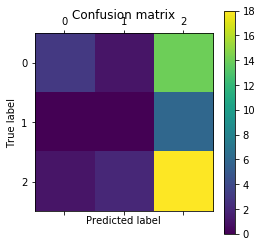

[[ 3  1 14]
 [ 0  0  6]
 [ 1  2 18]]


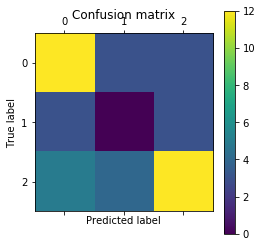

[[12  3  3]
 [ 3  0  3]
 [ 5  4 12]]


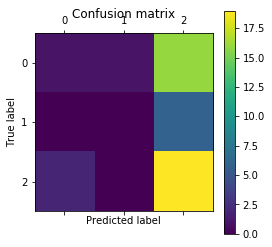

[[ 1  1 16]
 [ 0  0  6]
 [ 2  0 19]]


In [32]:
# display confusion matrix
def create_cm(t1, t2):
    cm = metrics.confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

create_cm(nb_expected, nb_predicted)    
create_cm(tree_expected, tree_predicted)
create_cm(log_expected, log_predicted)

## Revision 2 - Lemmitization

In [33]:
speechtext = speechdf["text"].astype(str).values.tolist()

In [34]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

lem_text = [" ".join([wnl.lemmatize(word) for word in sentence.split()]) for sentence in speechtext]

In [35]:
import nltk
from nltk import word_tokenize
newtext = []
wordtype = set(['R','V','N'])

for string in speechtext:
    newlem = []

    taggedlist = nltk.pos_tag(word_tokenize(string.lower()))
    for item in taggedlist:
        if item[1][0] in wordtype:
            postag = item[1][0].lower()
        elif item[1][0] == 'J':
            postag = 'a'
        else:
            postag = "n"

        lemmed = wnl.lemmatize(item[0], pos = postag)
        newlem.append(lemmed)
    
    newstring = " ".join(newlem)
    
    newtext =newtext + [newstring]

In [36]:
se = pd.Series(newtext)
speechdf['newtext'] = se.values

In [37]:
# Create the feature space
tfidf2 = TfidfVectorizer(binary=False, min_df = .03, max_df = .5,stop_words = custom_nltk, ngram_range = (1,2))
v2_speech = tfidf2.fit_transform(speechdf['newtext'])
print(cv_speech.shape)

(149, 71)


In [38]:
#Split the data
X = v2_speech.toarray()
y = speechdf['afinn'].values

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #random_state is set seed

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(104, 103)
(45, 103)
(104,)
(45,)


## Naive Bayes (Revision #2)

In [40]:
# fit a Naive Bayes model to the data
model = MultinomialNB()
print(model)
model.fit(X_train, y_train)

# make predictions
nb_expected = y_test
nb_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(nb_expected, nb_predicted)))
print(metrics.classification_report(nb_expected, nb_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.444444444444
accuracy: 0.444444444444
             precision    recall  f1-score   support

   Negative       0.50      0.06      0.10        18
    Neutral       0.00      0.00      0.00         6
   Positive       0.46      0.90      0.61        21

avg / total       0.42      0.44      0.33        45



## Decision Tree (Revision #2)

In [41]:
# fit a logistic regression model to the data
model = DecisionTreeClassifier(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
tree_expected = y_test
tree_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(tree_expected, tree_predicted)))
print(metrics.classification_report(tree_expected, tree_predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')
0.6
accuracy: 0.6
             precision    recall  f1-score   support

   Negative       0.68      0.72      0.70        18
    Neutral       0.00      0.00      0.00         6
   Positive       0.70      0.67      0.68        21

avg / total       0.60      0.60      0.60        45



In [42]:
#create the tree
#dot_data = tree.export_graphviz(model, out_file=None, 
#                         feature_names=tfidf.get_feature_names() ,  
#                         class_names=speechdf.afinn.unique() ,  
#                         filled=True, rounded=True,  
#                         special_characters=True) 

In [43]:
#graph = graphviz.Source(dot_data)  # creates the graph 
#graph #renders the graph inline

## Logistic Regression (Revision #2)

In [44]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model = LogisticRegression(random_state = 42)
print(model)
model.fit(X_train, y_train)

# make predictions
log_expected = y_test
log_predicted = model.predict(X_test)

print(model.score(X_test, y_test))

# summarize the fit of the model
print("accuracy: " + str(metrics.accuracy_score(log_expected, log_predicted)))
print(metrics.classification_report(log_expected, log_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.444444444444
accuracy: 0.444444444444
             precision    recall  f1-score   support

   Negative       0.00      0.00      0.00        18
    Neutral       0.00      0.00      0.00         6
   Positive       0.47      0.95      0.62        21

avg / total       0.22      0.44      0.29        45



## Confusion Matrix (Revision #2)

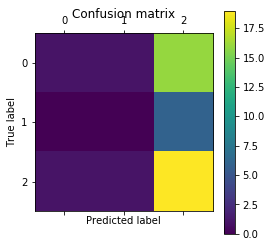

[[ 1  1 16]
 [ 0  0  6]
 [ 1  1 19]]


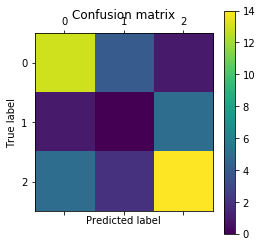

[[13  4  1]
 [ 1  0  5]
 [ 5  2 14]]


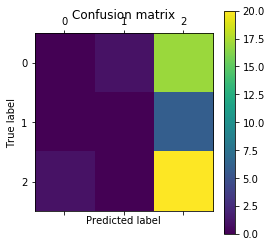

[[ 0  1 17]
 [ 0  0  6]
 [ 1  0 20]]


In [45]:
# display confusion matrix
def create_cm(t1, t2):
    cm = metrics.confusion_matrix(t1, t2)
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    print(cm)

create_cm(nb_expected, nb_predicted)    
create_cm(tree_expected, tree_predicted)
create_cm(log_expected, log_predicted)

### T3. Perform K-means clustering on your dataset.  Store the cluster assignments in the dataframe.

In [46]:
#K-Means
from sklearn.cluster import KMeans
speech_dm = v2_speech.toarray()
My_k =16
km = KMeans(n_clusters=My_k, init='k-means++', max_iter=100, random_state = 42)
news_k = km.fit(speech_dm)
clusters = km.labels_.tolist()
speechdf['clusters'] = clusters
print(speechdf['clusters'].value_counts())

14    16
2     14
11    13
5     12
13    11
7     11
3     10
10     9
9      9
4      9
6      8
15     6
1      6
0      6
12     5
8      4
Name: clusters, dtype: int64


In [47]:
k_range = range(1,50)
k_means_set = [KMeans(n_clusters=k,init='k-means++', max_iter=100, random_state = 42).fit(v2_speech) for k in k_range]
centroids_list = [km_result.cluster_centers_ for km_result in k_means_set]

In [48]:
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics.pairwise import euclidean_distances

k_euclid = [cdist(speech_dm, thing, 'euclidean') for thing in centroids_list]
distance_set = [np.min(k_euc, axis=1) for k_euc in k_euclid]

# total within-cluster sum of squares
wcss = [np.sum(distance**2) for distance in distance_set]

# total sum of squares
tss  = np.sum(pdist(speech_dm)**2) / speech_dm.shape[0]

# between cluster sum of squares
bss = tss - wcss

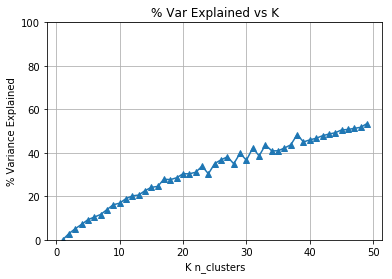

In [49]:
# plot elbow chart
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, '^-')
ax.set_ylim((0,100))
plt.grid(True)
plt.xlabel('K n_clusters')
plt.ylabel('% Variance Explained')
plt.title('% Var Explained vs K')

In [50]:
#Exporting the dataframe to a csv file so I can take a look at it in Excel
#speech.df.to_csv('speech_clusters.csv')

In [51]:
speechdf.head()

,text,cleantext,afinn,newtext,clusters
0,"Mr. Speaker, Mr. Vice President, members of Congress, the first lady of the United States, and my fellow Americans:","mr. speaker, mr. vice president, members of congress, the first lady of the america, and my fellow american:",Neutral,"mr. speaker , mr. vice president , member of congress , the first lady of the united state , and my fellow american :",5
1,"Less than one year has passed since I first stood at this podium, in this majestic chamber, to speak on behalf of the American people — and to address their concerns, their hopes and their dreams. That night, our new administration had already taken swift action. A new tide of optimism was already sweeping across our land.","less than one year has passed since i first stood at this podium, in this majestic chamber, to speak on behalf of the american people — and to address their concerns, their hopes and their dreams. that night, our new administration had already taken swift action. a new tide of optimism was already sweeping across our land.",Positive,"less than one year have pass since i first stand at this podium , in this majestic chamber , to speak on behalf of the american people — and to address their concern , their hope and their dream . that night , our new administration have already take swift action . a new tide of optimism be already sweeping across our land .",4
2,"Each day since, we have gone forward with a clear vision and a righteous mission — to make America great again for all Americans.","each day since, we have gone forward with a clear vision and a righteoamerican mission — to make america great again for all american.",Positive,"each day since , we have go forward with a clear vision and a righteous mission — to make america great again for all american .",6
3,"Over the last year, we have made incredible progress and achieved extraordinary success. We have faced challenges we expected, and others we could never have imagined. We have shared in the heights of victory and the pains of hardship. We endured floods and fires and storms. But through it all, we have seen the beauty of America's soul, and the steel in America's spine.","over the last year, we have made incredible progress and achieved extraordinary success. we have faced challenges we expected, and others we could never have imagined. we have shared in the heights of victory and the pains of hardship. we endured floods and fires and storms. but through it all, we have seen the beauty of america's soul, and the steel in america's spine.",Positive,"over the last year , we have make incredible progress and achieve extraordinary success . we have face challenge we expect , and others we could never have imagine . we have share in the height of victory and the pain of hardship . we endure flood and fire and storm . but through it all , we have see the beauty of america 's soul , and the steel in america 's spine .",11
4,"Each test has forged new American heroes to remind us who we are, and show us what we can be.","each test has forged new american heroes to remind american who we are, and show american what we can be.",Positive,"each test have forge new american hero to remind u who we be , and show u what we can be .",6
